## Bài thống kê 2

Sử dụng data của thực hành lý 2 và vẽ đồ thị theo yêu cầu

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statistics 

In [10]:
os.getcwd()

'C:\\Users\\minec\\PROJECTS\\Jupyter\\BT Thong Ke\\BT_TK_2'

In [11]:
data = pd.read_excel('data.xlsx')
display(data)

,I(A),B(mT),Unnamed: 2,z,Bz(mT)
0,0.00,0.00,NaN,-14,0.68
1,0.25,0.08,NaN,-12,0.77
2,0.50,0.19,NaN,-10,0.88
3,0.75,0.32,NaN,-8,0.99
4,1.00,0.44,NaN,-6,1.10
5,1.25,0.55,NaN,-4,1.18
6,1.50,0.67,NaN,-2,1.24
7,1.75,0.81,NaN,0,1.27
8,2.00,0.93,NaN,2,1.25
9,2.50,1.16,NaN,4,1.21


# Draw a chart of ${ B = f(I)}$

## And caculate ${\Delta B, \Delta I}$

Text(1.3, 0.175, '$R^2$ = 0.9986')

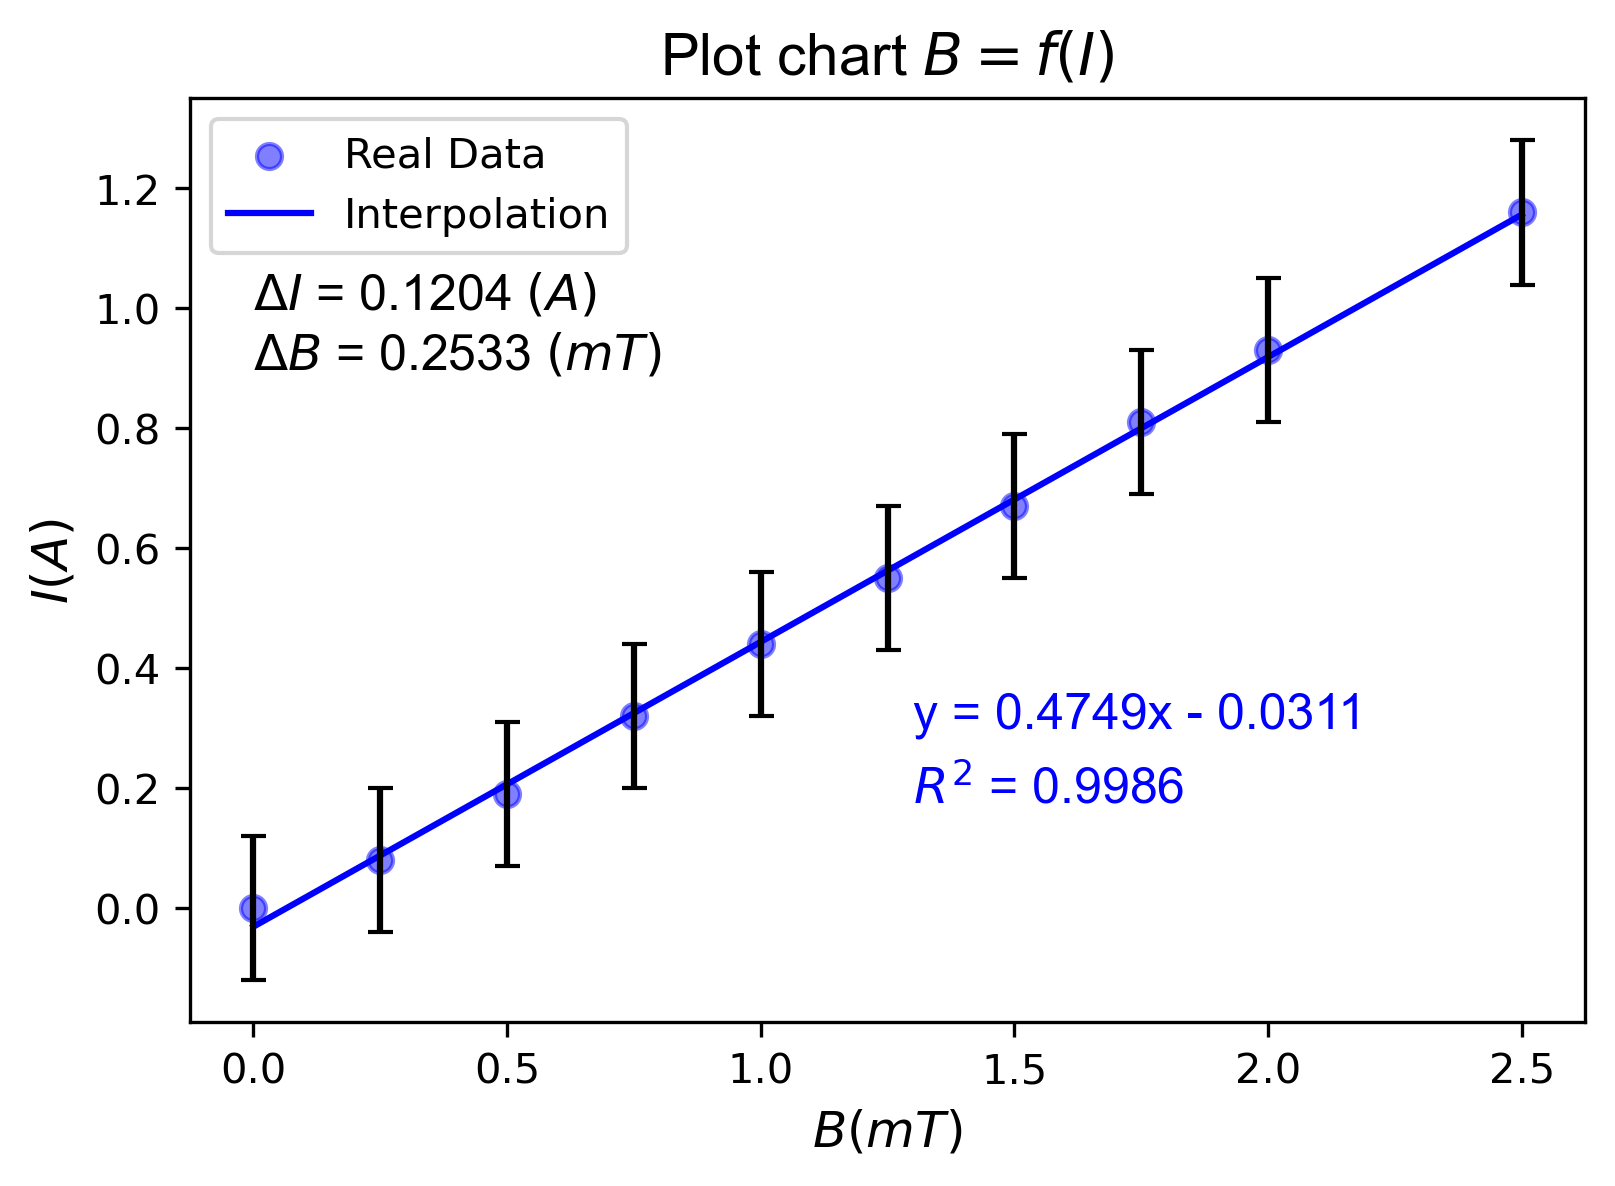

In [110]:
x = np.array(data[0:10]['I(A)'])
y = np.array(data[0:10]['B(mT)'])

plt.figure(figsize=(6,4), dpi=300)

# scatter chart
plt.scatter(x,y, color='blue', alpha=.5, label='Real Data')

# poly fit
xs = np.linspace(min(x), max(x), 1000)
f = np.polyfit(x, y, 1)
yf = f[0]*xs + f[1]
plt.plot(xs, yf, color='blue', label='Interpolation')

# error number
ery = statistics.stdev(y) / (np.sqrt(len(y)))
erx = statistics.stdev(x) / (np.sqrt(len(x)))
plt.errorbar(x, y, yerr=ery, linestyle='none', color='black', capsize=3)

# regression
y2 = f[0]*x + f[1]
SSR = sum( (y2 - np.mean(y))**2 )
SST = sum( (y - np.mean(y))**2 )
R2 = SSR/SST

# text
plt.legend()
plt.title(r'Plot chart $B=f(I)$', fontsize=14, fontname='arial')
plt.xlabel(r'$B(mT)$', fontsize=12, fontname='arial')
plt.ylabel(r'$I(A)$', fontsize=12, fontname='arial')

plt.text(0, 1.2-0.2, r'$\Delta I$ = ' + str(round(ery,4)) + r' $(A)$', fontsize = 12, fontname='arial')
plt.text(0, 1.1-0.2, r'$\Delta B$ = ' + str(round(erx,4)) + r' $(mT)$', fontsize=12, fontname='arial')

plt.text(1.3, 0.3, r'y = ' + str(round(f[0],4)) + r'x - ' + str(np.abs(round(f[1],4))), fontsize=12, fontname='arial', color='blue' )
plt.text(1.3, 0.175, r'$R^2$ = ' + str(round(R2,4)), fontsize=12, fontname='arial', color='blue' )

# Draw plot ${B = f(z)}$

## And calulate ${\Delta B, \Delta z}$

Text(-8, 0.7999999999999999, '$R^2$ = 0.979')

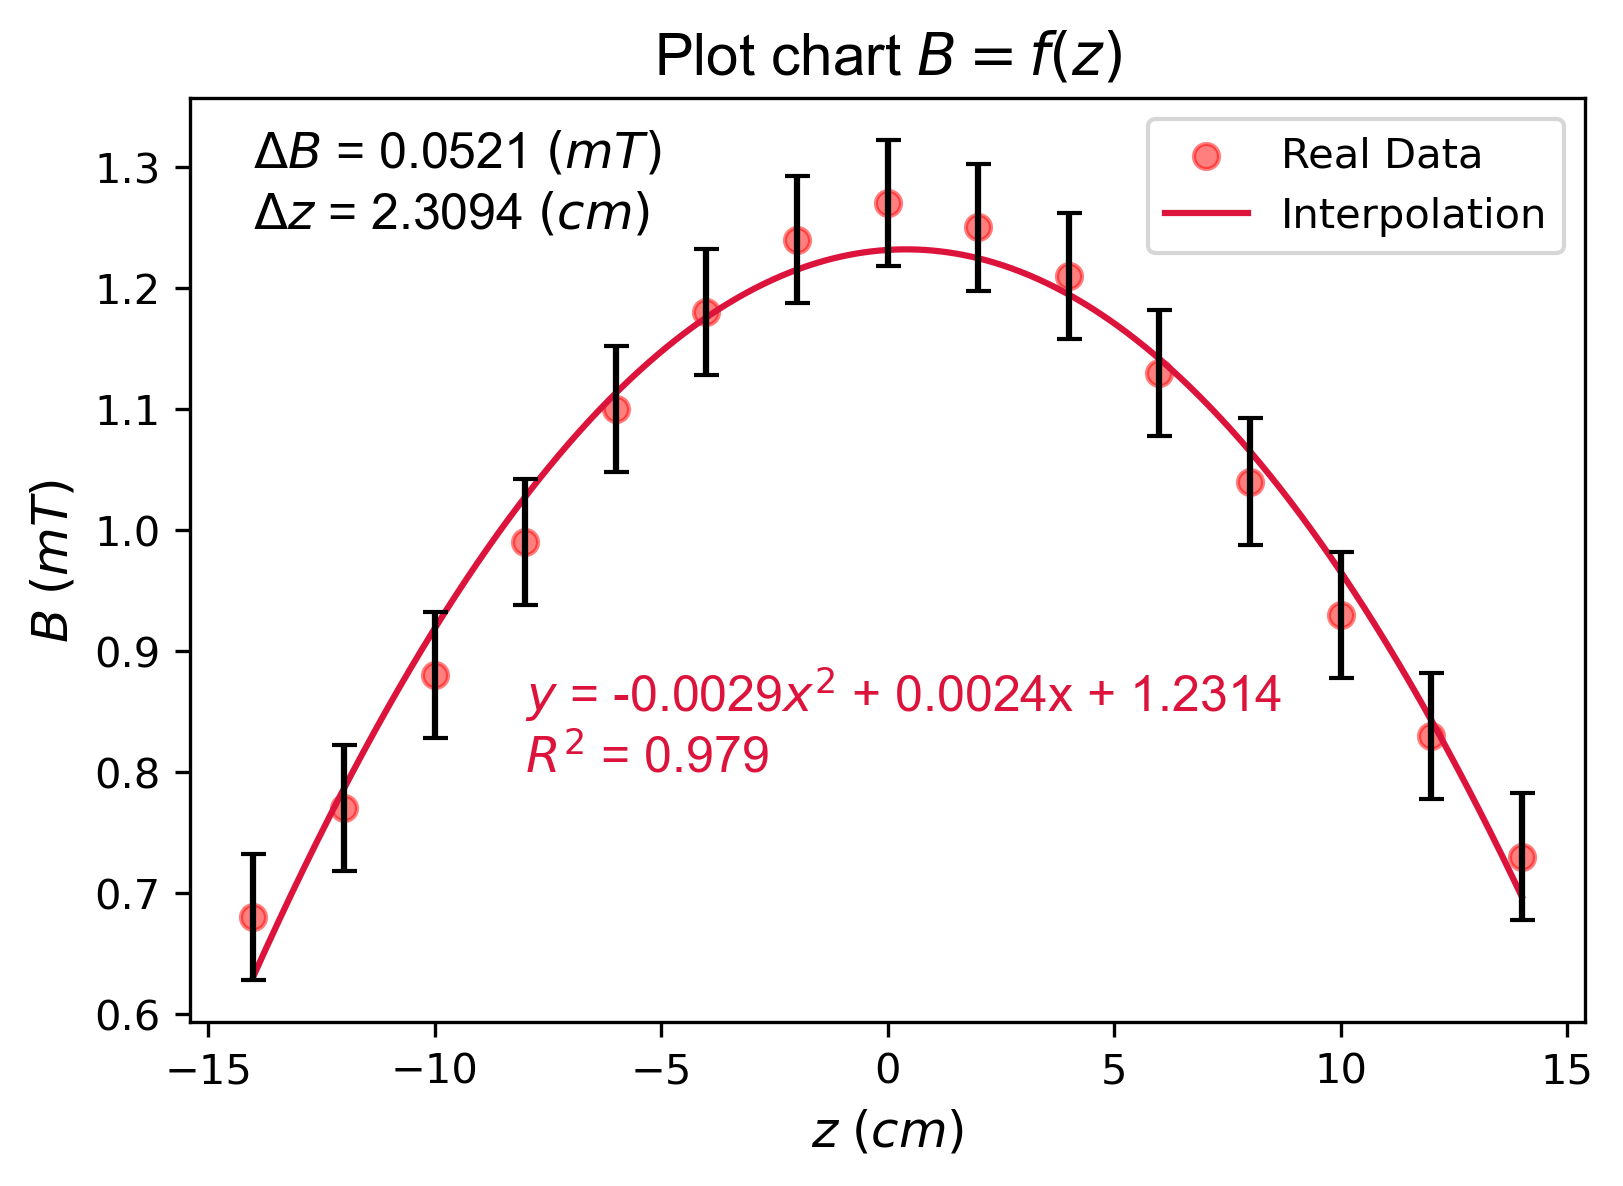

In [107]:
plt.figure(figsize=(6,4), dpi=300)

x = np.array(data[0:]['z'])
y = np.array(data[0:]['Bz(mT)'])

# Scatter chart
plt.scatter(x, y, color='r', alpha=.5, label='Real Data')

# poly fit
xs = np.linspace(min(x), max(x), 1000)
f2 = np.polyfit(x,y, 2)
yf2 = f2[0]*xs**2 + f2[1]*xs + f2[2]
plt.plot(xs, yf2, color='crimson', label='Interpolation')

# Error number
erx = statistics.stdev(x) / (np.sqrt(len(x)))
ery = statistics.stdev(y) / (np.sqrt(len(y)))
plt.errorbar(x, y, yerr=ery, linestyle='none', color='black', capsize=3)

# regression
y2 = f2[0]*x**2 + f2[1]*x + f2[2]
SSR = sum( (y2 - np.mean(y))**2 )
SST = sum( (y - np.mean(y))**2 )
R2 = SSR/SST

# Text
plt.legend()
plt.title(r'Plot chart $B=f(z)$', fontsize=14, fontname='arial')
plt.xlabel(r'$z$ $(cm)$', fontsize=12, fontname='arial')
plt.ylabel(r'$B$ $(mT)$', fontsize=12, fontname='arial')

plt.text(-14, 1.3, r'$\Delta B$ = ' + str(round(ery,4)) + r' $(mT)$', fontsize=12, fontname='arial')
plt.text(-14, 1.3-0.05, r'$\Delta z$ = ' + str(round(erx,4)) + r' $(cm)$', fontsize=12, fontname='arial')

plt.text(-8, 0.85, r'$y$ = ' + str(round(f2[0],4)) + r'$x^2$ + ' + str(round(f2[1],4)) + r'x + ' + str(round(f2[2],4)), fontsize=12, fontname='arial', color='crimson')
plt.text(-8, 0.85-0.05, r'$R^2$ = ' + str(round(R2,4)), fontsize=12, fontname='arial', color='crimson')